In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
pop_path = f'{h08dir}/global_city/dat/pop_tot_/GPW4ag__20100000.gl5'
pop = np.fromfile(pop_path, dtype='float32').reshape(2160, 4320)
riv_path = f'{h08dir}/wsi/dat/riv_out_/W5E5LR__00000000.gl5'
rivout = np.fromfile(riv_path, dtype='float32').reshape(2160, 4320)
rivnum_path = f'{h08dir}/global_city/dat/riv_num_/rivnum.CAMA.gl5'
rivnum = np.fromfile(rivnum_path, dtype='float32').reshape(2160, 4320)
rivara_path = f'{h08dir}/global_city/dat/riv_ara_/rivara.CAMA.gl5'
rivara = np.fromfile(rivara_path, dtype='float32').reshape(2160, 4320)

uids = np.unique(rivnum)
world = np.zeros((2160, 4320))

for i, uid in enumerate(uids):
    mask = (rivnum == uid)
    pop_basin = pop[mask]
    pop_sum = np.sum(pop_basin)
    rivara_masked = np.ma.masked_where(~mask, rivara)
    largest_rivara_index = np.argmax(rivara_masked)
    largest_rivara_coords = np.unravel_index(largest_rivara_index, rivara.shape)
    supply = rivout[largest_rivara_coords]
    supply_sum = np.sum(supply) * 60 * 60 * 24 * 365 / 1000
    if pop_sum == 0:
        cmy = 0
    else:
        cmy = supply_sum/pop_sum
        
    if np.sum(world[mask]) < 1:
        world[mask] = cmy
        
    if i % 1e4 == 0:
        print(i)
        
def geography(left, right, bottom, top):
    #
    resolution = 12
    #
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (left, right, bottom, top)
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent
    
#upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-180, 180, -90, 90)
#region = world[upperindex:lowerindex, leftindex:rightindex]
#region_masked = np.ma.masked_where(region==0, region)
#plt.imshow(region_masked)
#plt.show()

savepath = f'{h08dir}/wsi/dat/MPCY/world_basin_mpcy_backup.npy'
np.save(savepath, world)
print(f'{savepath} is saved')

0
10000
20000
30000
40000
50000


In [32]:
print(np.max(region_masked))
print(np.min(region_masked))
uniques = np.unique(region_masked)
sorted_indices = np.argsort(uniques)
sorted_region_masked = uniques[sorted_indices]
#print(sorted_region_masked[:100])

620737827054.8754
9.253951500787949
[9.253951500787949 24.238624219221037 32.72329894438308 38.15146675244313
 41.03184970490596 43.24271605475887 46.77202243837604 51.643350913350126
 66.0368602519592 74.9740747255877 75.54578912491233 81.34503760484793
 97.10639067651921 97.85951048103915 97.92560320783853 99.18785847274567
 101.02207359886422 103.02945592907773 103.45410092251791
 105.54656142233975 108.24320648220991 115.7828075355523
 116.09227987378101 119.49910888437084 123.18835466103057
 124.57702972176918 125.0205092869313 128.76110738388115
 129.66270316869978 138.4480314576969 144.0781119060771 145.19903897043866
 159.9527661694598 160.44715644037643 166.83749167873435 167.3054777510484
 174.68156763816293 174.92234603350366 178.54953326772846
 180.7882206871789 181.62473803341058 181.83936140896017
 184.15885922954922 196.3422784039446 201.66011261219776
 203.13393381817195 204.4398076169206 204.59113129439845
 213.09366988346983 221.38968312824207 222.11054256248377
 225.

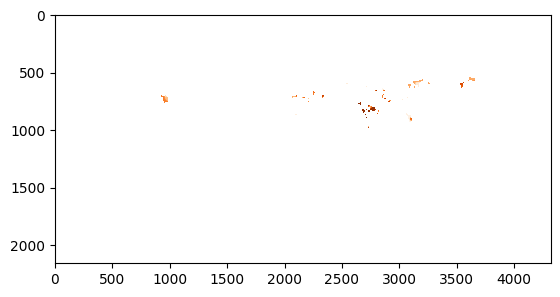

In [34]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-180, 180, -90, 90)
region = world[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)
region_stressed = np.ma.masked_where(region_masked>1000, region_masked)
plt.imshow(region_stressed, cmap='Oranges_r')
plt.show()